In [1]:
# PACE Plan



## About the Dataset
The dataset is comprised of property sales 2016-2017 in Melbourne City and its surrounding region, Australia. It includes 21 variables such as the name of the suburb, address of premises, type of property, number of rooms, price, method of selling, seller information, date of the sale, the distance from the city centre, postcode, the number of bedroom and bathroom, car space, the size of the land, building area, council area, latitude and longitude, the name of the region, and property count. There are 18936 rows and 22 columns with one unnamed. Through data discovery, we learn that the there are presumably 18936 individual sales (including duplicates and null values if any) and 21 variables. 


## Step 1. Import packages and Load Dataset

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 300)


# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_ccpr_grid


# Data Modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Evaluation Metrics and utility functions
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, classification_report, roc_auc_score,roc_curve, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import pearsonr
from sklearn.tree import plot_tree
from datetime import datetime
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
from IPython.display import Image


# Save Models
import pickle




# Step 2. Initial EDA

## Load & Learn the Data


In [3]:
#Read the dataset
df = pd.read_csv('Data/Property Sales of Melbourne City.csv')


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [5]:
# Find the number of rows and columns displayed in tuple (no of rows, no of columns)
df.shape

(18396, 22)

In [6]:
#Display the first 10 rows of the data
df.head(10)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,10,Abbotsford,129 Charles St,2,h,941000,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,15,Abbotsford,217 Langridge St,3,h,1000000,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [7]:
#Display the last 10 rows of the data
df.tail(10)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18386,23535,Westmeadows,9 Black St,3,h,582000,S,Red,26/08/2017,16.5,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
18387,23536,Westmeadows,81 Hillcrest Dr,4,h,720000,VB,Barry,26/08/2017,16.5,3049.0,4.0,2.0,0.0,NaN,NaN,NaN,NaN,-37.68006,144.87550,Northern Metropolitan,2474.0
18388,23537,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
18389,23538,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
18390,23539,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
18395,23546,Yarraville,33 Freeman St,4,h,1050000,VB,Village,26/08/2017,6.3,3013.0,4.0,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


In [8]:
#Calculate summary statistics of the data
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data Wrangling & Feature Engineering



Upon further reflection, I reckon there are some corrections needed to be made to lessen the impact of potential misunderstandings caused by non-intuitive variable names. 

In [9]:
#Drop the variable that is redundant
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [10]:

#Rename the variables to make them more descriptive
df = df.rename(columns = {'Rooms': 'RoomCounts',
              'Method': 'MethodOfSale',
              'SellerG': 'SellerGroup',
              'Type': 'PropertyType',
              'Bedroom2': 'BedroomCounts',
              'Bathroom': 'BathroomCounts',
              'Car': 'CarSpaceCounts',
              'Distance': 'DistanceToCBD',
              'Landsize':'LandSize',
              'Lattitude': "Latitude",
              'Longtitude': 'Longitude',
              'Regionname': 'Region',
              'Propertycount': 'SuburbPropertyCounts'}
               )



In [11]:
#Displays description of the variables
column_info = {
  'Variable': df.columns,
  'Description': ['Name of the suburb where the property is located', 'Address of the property', 'Number of rooms in the property (excluding bathrooms and other non-living spaces)', 'Type of property (e.g., h = house, t = townhouse, u = unit/apartment)', 'Sale price of the property in Australian Dollars', 'Method of sale (e.g., S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction)',' Real estate agency or agent handling the sale', 'Date of the sale','Distance from the property to Melbourne central business district (CBD) in kilometers', 'postcode of the suburb', 'Number of bedrooms in the property (including any non-living spaces that could be used as bedrooms)', 'Number of bathrooms in the property', 'Number of car spaces associated with the property', 'Land size of the property in square meters', 'Total building area of the property in square meters', 'The year the property was built ', 'Name of the local government area where the property is located', 'the position of the property in latitude', 'the position of the property in longitude', ' Name of the region where the property is located (e.g., Eastern Metropolitan, Northern Metropolitan, Southern Metropolitan, Western Metropolitan)', 'Number of properties that exist in the suburb']
}
df_info = pd.DataFrame(column_info)
df_info

,Variable,Description
0,Suburb,Name of the suburb where the property is located
1,Address,Address of the property
2,RoomCounts,Number of rooms in the property (excluding bathrooms and other non-living spaces)
3,PropertyType,"Type of property (e.g., h = house, t = townhouse, u = unit/apartment)"
4,Price,Sale price of the property in Australian Dollars
5,MethodOfSale,"Method of sale (e.g., S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction)"
6,SellerGroup,Real estate agency or agent handling the sale
7,Date,Date of the sale
8,DistanceToCBD,Distance from the property to Melbourne central business district (CBD) in kilometers
9,Postcode,postcode of the suburb


In [12]:
#Checks for missing values in the dataframe
df.isna().sum()


Suburb                      0
Address                     0
RoomCounts                  0
PropertyType                0
Price                       0
MethodOfSale                0
SellerGroup                 0
Date                        0
DistanceToCBD               1
Postcode                    1
BedroomCounts            3469
BathroomCounts           3471
CarSpaceCounts           3576
LandSize                 4793
BuildingArea            10634
YearBuilt                9438
CouncilArea              6163
Latitude                 3332
Longitude                3332
Region                      1
SuburbPropertyCounts        1
dtype: int64

In [13]:
#Calculate the proportion of missing values in the dataframe per variable
null_values = pd.DataFrame({'Null Values': df.isna().sum(), 'Proportion Null Values': df.isna().sum()*100/len(df)})
null_values = null_values.sort_values(by='Proportion Null Values', ascending=False)
null_values

,Null Values,Proportion Null Values
BuildingArea,10634,57.806045
YearBuilt,9438,51.304631
CouncilArea,6163,33.501848
LandSize,4793,26.054577
CarSpaceCounts,3576,19.439008
BathroomCounts,3471,18.868232
BedroomCounts,3469,18.857360
Longitude,3332,18.112633
Latitude,3332,18.112633
Region,1,0.005436


An Approriate measure has to be taken in order to mitigate such issue. Some of the variables that have null values even exceeds 50% of all the data entries. In order to ensure data integrity and effectiveness of subsequent analysis, data imputation is required. Depending on the objectives the analysis, one might drop a data column all together as it is deemed redundant and provide little to no value to our analysis endeavour. 


In [14]:
#Data Imputation
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median()).round()
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median()).round()
df['LandSize'] = df['LandSize'].fillna(df['LandSize'].median()).round()
df['CarSpaceCounts']=df['CarSpaceCounts'].fillna(df['CarSpaceCounts'].median()).round()
df['BedroomCounts']=df['BedroomCounts'].fillna(df['BedroomCounts'].median()).round()
df['BathroomCounts']=df['BathroomCounts'].fillna(df['BathroomCounts'].median()).round()


In [15]:
#Drop the variables 
df.drop('CouncilArea', axis= 1, inplace = True)
df.dropna(subset=['Latitude','Longitude'], inplace= True)

'CouncilArea' does not provide significant context to the analysis later on as we already have region and suburbs as a way to distinguish the geography between premises, especially that rougly 33.5% of the data are missing the variable value. 



In [16]:
# Mapping the variable value to be descriptive and modify the variable to bring out more informational value
df['PropertyAge'] = datetime.now().year - df['YearBuilt']
df.loc[df['Region'] == 'Eastern Metropolitan', 'Region'] = 'North-Eastern Metropolitan'
df['PropertyType'] = df['PropertyType'].map({'h':'house','t':'townhouse', 'u':"apartment" })
df['MethodOfSale'] = df['MethodOfSale'].map({'S': 'property sold', 'SP':'property sold prior', 'VB': 'vendor bid', 'PI':'property passed in', 'SN':'sold not disclosed', 'W': 'withdrawn prior to auction', 'SA': 'sold after auction', 'PN': 'sold prior not disclosed'})


In [17]:
#Check for duplicate rows/entries in the dataframe
df.duplicated().sum()

0

It seems that there are no missing rows/entries

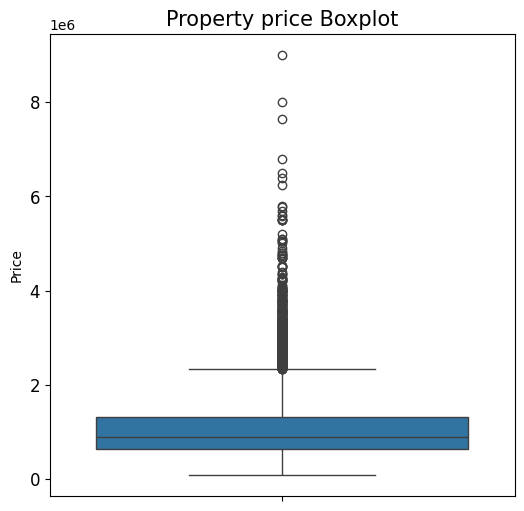

In [18]:
#Check for Outliers in the data
plt.figure(figsize=(6,6))
plt.title('Property price Boxplot', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=df['Price'])
plt.show()

In [19]:
#Calculate the 25th and 75th percentile of the price variable
percentile_25th = df['Price'].quantile(0.25)

#Calculate the 75th percentile of the price variable
percentile_75th = df['Price'].quantile(0.75)

#Calculate the interquartile range
iqr = percentile_75th - percentile_25th

#Define the upper and lower limit for inlier values in the price variable
upper_limit = percentile_75th + 1.5*iqr
lower_limit = percentile_25th - 1.5*iqr
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

outlier_values = df[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]
print("Number of outliers: ", len(outlier_values))

Upper Limit:  2340000.0
Lower Limit:  -380000.0
Number of outliers:  684


# PACE Analyze



## Continue EDA 


## Top 10 Priciest and Cheapest Suburb Measured In Median Price

C:\Users\Dustin\AppData\Local\Temp\ipykernel_9576\1404395012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Suburb', y='Price', data= top_10_median, palette='viridis')


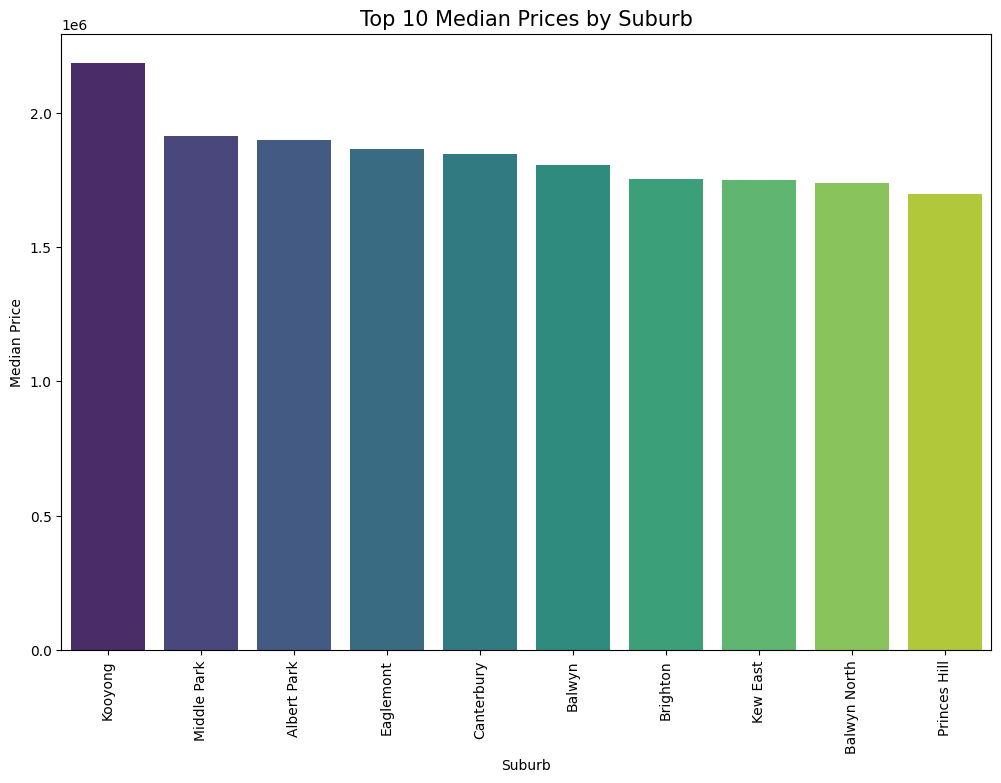

In [20]:
median_property_prices = df.groupby('Suburb')['Price'].median().reset_index()
top_10_median = median_property_prices.sort_values(by='Price', ascending=False).head(10)



plt.figure(figsize=(12,8))
sns.barplot(x= 'Suburb', y='Price', data= top_10_median, palette='viridis')
plt.title('Top 10 Median Prices by Suburb', fontsize = 15)
plt.xlabel('Suburb')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()



C:\Users\Dustin\AppData\Local\Temp\ipykernel_9576\1223927169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Suburb', y='Price', data= bottom_10_median, palette='viridis')


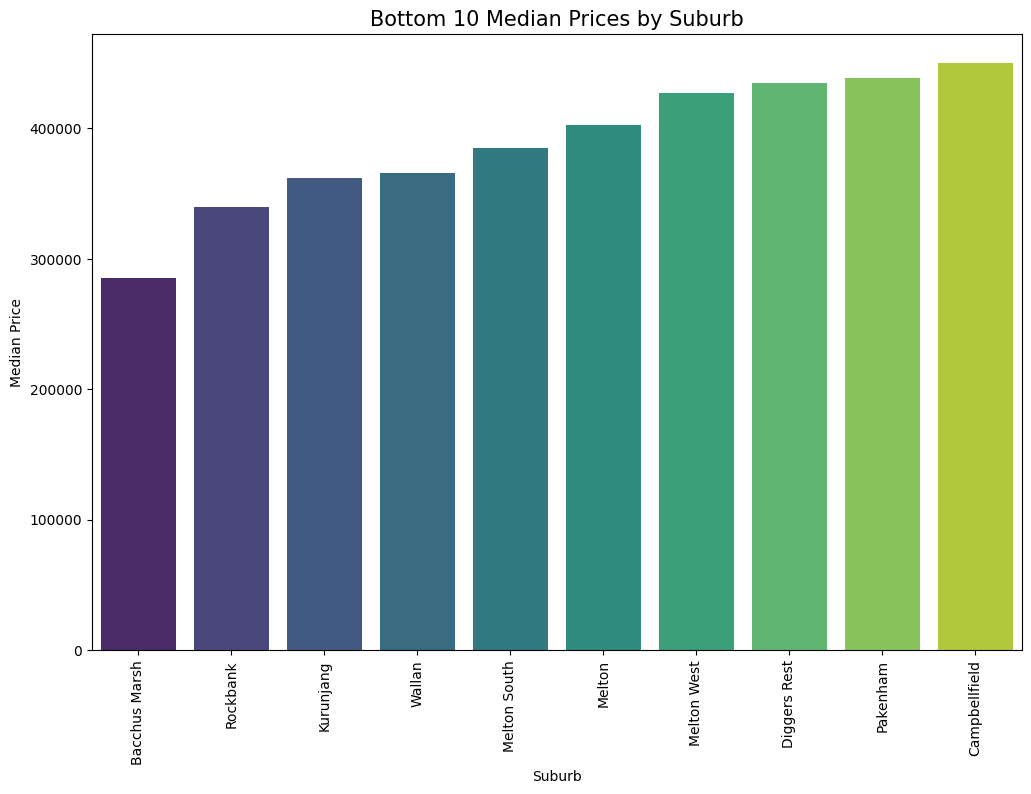

In [21]:
bottom_10_median = median_property_prices.sort_values(by='Price', ascending=True).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x= 'Suburb', y='Price', data= bottom_10_median, palette='viridis')
plt.title('Bottom 10 Median Prices by Suburb', fontsize = 15)
plt.xlabel('Suburb')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()


## Property Type Most Sold

C:\Users\Dustin\AppData\Local\Temp\ipykernel_9576\2171426394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PropertyType', y='count', data = region_property_count, palette='deep')


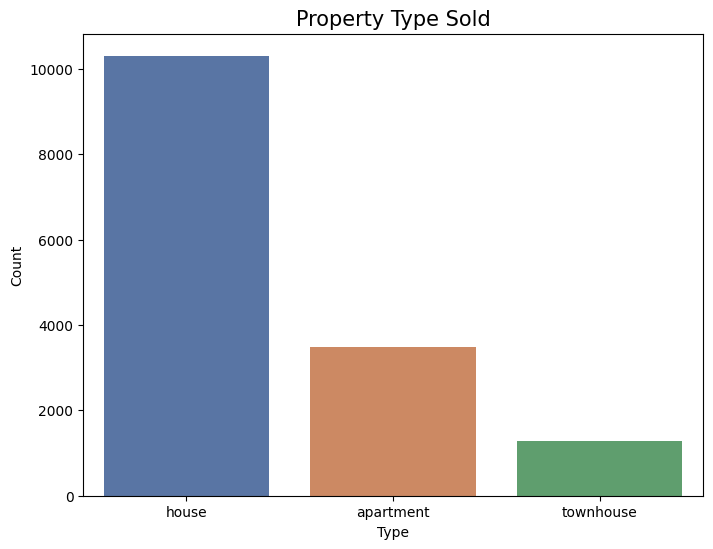

In [22]:
region_property_count = df['PropertyType'].value_counts().reset_index().rename(columns={'index':'Type', 'Type':'count'})
plt.figure(figsize=(8,6))
sns.barplot(x='PropertyType', y='count', data = region_property_count, palette='deep')
plt.title('Property Type Sold', fontsize = 15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


# Map of the property sold divided by the price group

Text(0.5, 1.0, 'Map Property Sold by Price Group')

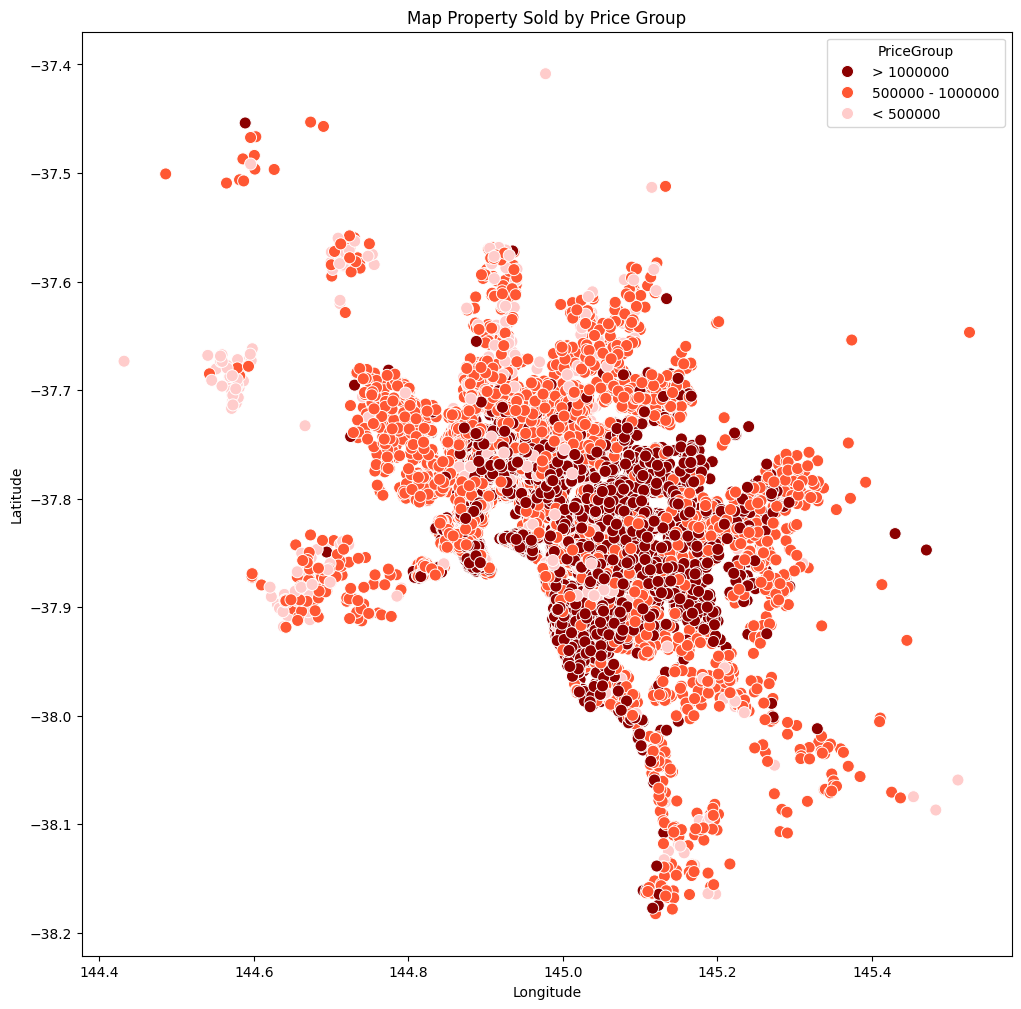

In [23]:
def price_category(price):
  if price < 500000:
   return '< 500000'
  elif price >= 500000 and price < 1000000:
   return '500000 - 1000000'
  else:
   return '> 1000000' 
df['PriceGroup'] = df['Price'].apply(price_category)
plt.figure(figsize=(12,12))
custom_palette = {'< 500000': '#FFCCCB', '500000 - 1000000': '#FF5733', '> 1000000':  '#8B0000'}
sns.scatterplot(x='Longitude',y='Latitude', data=df, hue='PriceGroup', s = 75, palette=custom_palette)
plt.title('Map Property Sold by Price Group')

In [24]:
df.sort_values(by='Price', ascending=False).head(15)


,Suburb,Address,RoomCounts,PropertyType,Price,MethodOfSale,SellerGroup,Date,DistanceToCBD,Postcode,BedroomCounts,BathroomCounts,CarSpaceCounts,LandSize,BuildingArea,YearBuilt,Latitude,Longitude,Region,SuburbPropertyCounts,PropertyAge,PriceGroup
15270,Mulgrave,35 Bevis St,3,house,9000000,property passed in,Hall,29/07/2017,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,64.0,> 1000000
9754,Canterbury,49 Mangarra Rd,5,house,8000000,vendor bid,Sotheby's,13/05/2017,9.0,3126.0,5.0,5.0,4.0,2079.0,464.0,1880.0,-37.81790,145.06940,Southern Metropolitan,3265.0,144.0,> 1000000
12219,Hawthorn,49 Lisson Gr,4,house,7650000,property sold,Abercromby's,17/06/2017,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,-37.82652,145.03052,Southern Metropolitan,11308.0,161.0,> 1000000
16308,Armadale,42 Hampden Rd,4,house,6800000,vendor bid,Marshall,16/09/2017,6.3,3143.0,4.0,2.0,2.0,440.0,126.0,1970.0,-37.85801,145.01383,Southern Metropolitan,4836.0,54.0,> 1000000
4599,Kew,15 Barry St,6,house,6500000,property sold,Jellis,13/08/2016,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,-37.80290,145.02670,Southern Metropolitan,10331.0,134.0,> 1000000
16113,Middle Park,136 Page St,5,house,6400000,property sold,Marshall,9/09/2017,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,-37.84908,144.95753,Southern Metropolitan,2019.0,104.0,> 1000000
8143,Toorak,17 Albany Rd,3,house,6250000,property sold,Kay,15/10/2016,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,-37.84860,145.02440,Southern Metropolitan,7217.0,24.0,> 1000000
9589,Brighton,161 Church St,5,house,5800000,property passed in,Castran,8/04/2017,11.2,3186.0,5.0,4.0,4.0,1276.0,126.0,1880.0,-37.91640,144.99740,Southern Metropolitan,10579.0,144.0,> 1000000
18073,Glen Iris,1 Anthony St,5,house,5770000,property sold,Marshall,26/08/2017,7.3,3146.0,5.0,3.0,2.0,440.0,638.0,2011.0,-37.86048,145.04870,Southern Metropolitan,10412.0,13.0,> 1000000
7184,South Yarra,18 Avoca St,4,house,5700000,property sold,Castran,12/11/2016,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,-37.83770,144.98940,Southern Metropolitan,14887.0,144.0,> 1000000


<Axes: xlabel='Longitude', ylabel='Latitude'>

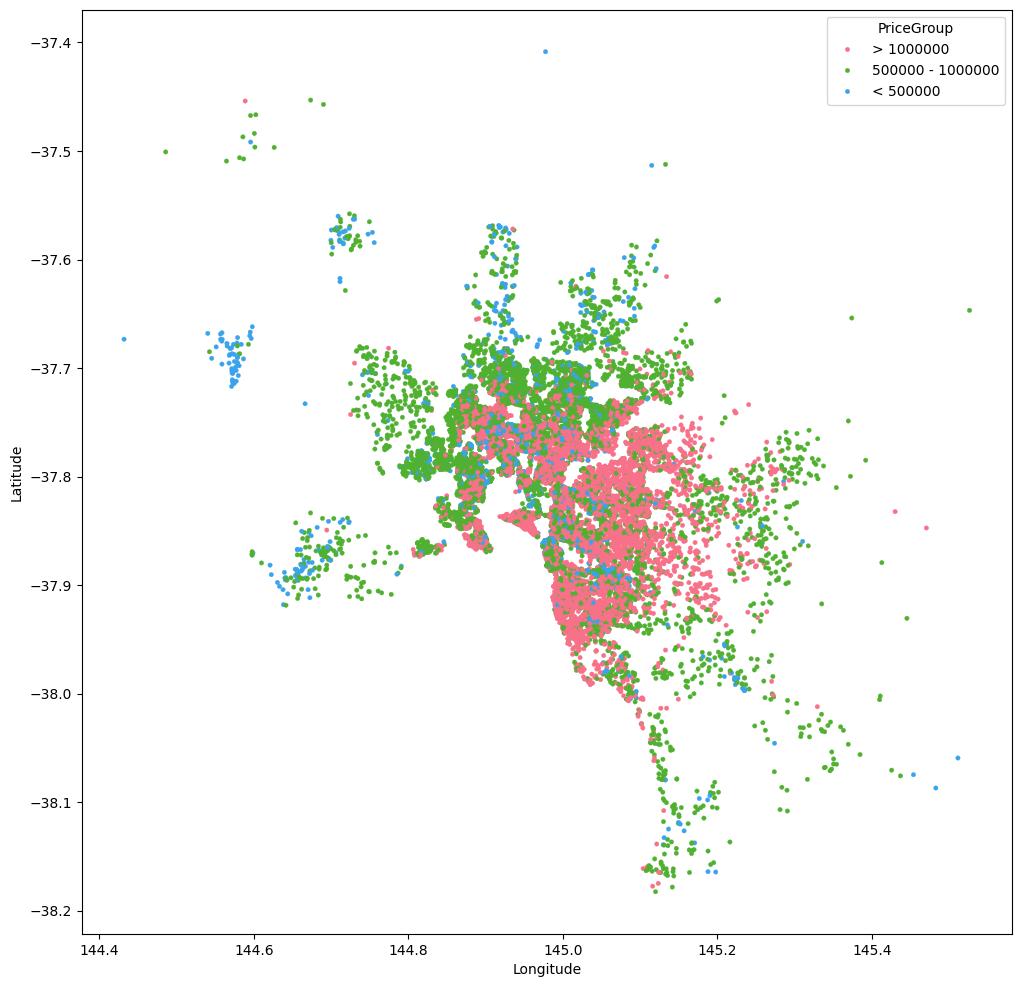

In [25]:
#Makes it easier to distinguish with hue color
plt.figure(figsize=(12,12))
sns.scatterplot(x='Longitude',y='Latitude', data =df, hue='PriceGroup',s =10,palette='husl', edgecolor= None)

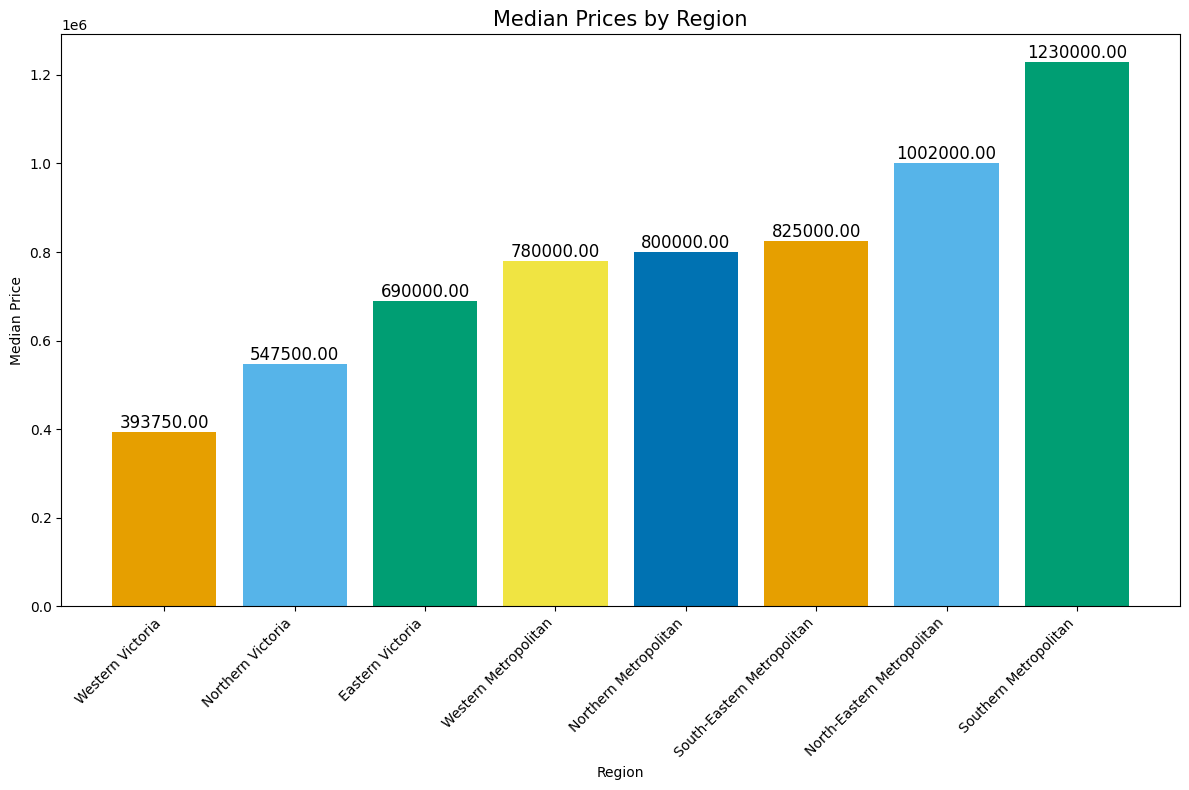

In [26]:
region_median_prices = df.groupby('Region')['Price'].median().reset_index().sort_values(by='Price')



plt.figure(figsize=(12,8))
region_median_prices_bar = plt.bar(region_median_prices['Region'], region_median_prices['Price'], color=['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2'])
plt.title('Median Prices by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Median Price')
plt.xticks(rotation=45,ha='right',fontsize=10)


for each_bar in region_median_prices_bar:
  height = each_bar.get_height()
  plt.text(each_bar.get_x() + each_bar.get_width()/2, height, f'{height:.2f}', ha='center',va='bottom',fontsize=12)

plt.tight_layout()
plt.show()

The map provides useful insights on the geography of price distribution of properties spread across Melbourne. From the map, it implies that coastal areas and the proximity of a property to CBD may indicate higher prices of property sold in general. As for visualizing the partition of each Metropolitan region in Melbourne, I refer to the map from the website of Victorian Electoral Commission (https://www.vec.vic.gov.au/electoral-boundaries/download-boundary-maps). 


In [27]:
image_map_path = 'Map Metropolitan/Metropolitan Region.png'
Image(filename=image_map_path)

# Regression on Price and Distance to CBD, Land Area, Building Area, Car Spaces, Property Age, Property Type
To evaluate the relationship between independent variables (Distance to CBD, Land Area, Building Area, and Number of Car spaces) and continuous dependent variable that is price, we ought to use linear regression. Before we create multivariate regression, we have to check our assumptions first.
Assumptions:
- Independence: Each record does not impact other records or should be independent of each other.


## Testing Linearity
To test this, we plot the regression with each independent variable and the dependent variable to check whether the relationship between both variables is linear or not.






In [28]:
#Find the maximum Land Area to establish the range of land area
# max_land_area = df['LandSize'].max()
# max_land_area


As property price is widely known to be positively skewed, therefore statistics used to describe the price of the properties sold is usually in median instead of mode as it is more  robust to outliers. To optimize the performance of the model we are going to use later for analysis, I ought to transform the data using the most common technique of data transformation, log transformation.


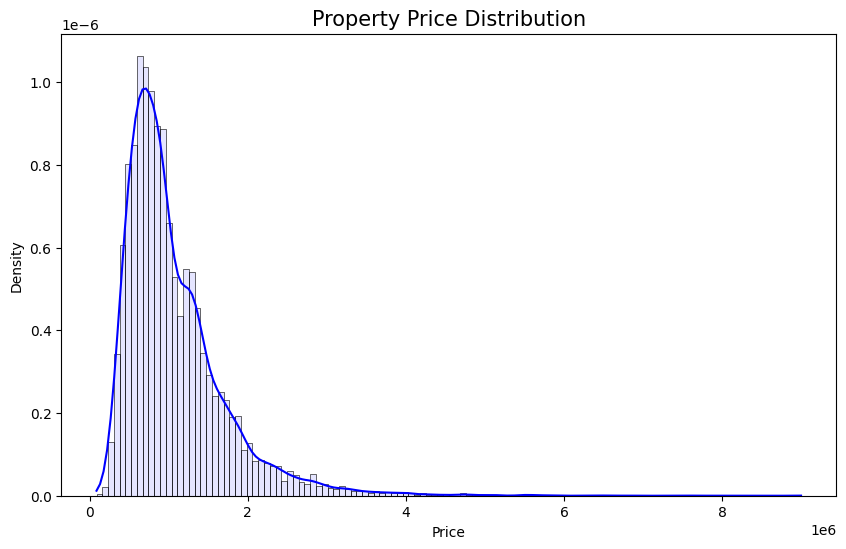

In [29]:
#Dependent Variable
plt.figure(figsize = (10,6))



#Using the square root method to get the number of bins - root of n
bins_sqrt_price = int(np.sqrt(len(df['Price'])))
sns.histplot(df['Price'], kde=True, bins = bins_sqrt_price, color='blue', alpha = 0.1, stat='density')
plt.title('Property Price Distribution', fontsize = 15)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()







In [30]:
check_skewness_dependent_var = df['Price'].skew()
print(check_skewness_dependent_var)


2.288428756109973


Based on that, we can tell that the skewness of the price variable is high (categorized by skew higher than 1). Therefore, this may be a great opportunity to use log transformation so that it can lead to more reliable statistical analysis and better model performance. Additionally, such method can stabilize variance which would prove useful for linear regression result. Lastly, it may help to met the linearity assumption, hence making linear regression model to be more approriate for the data. Before we calculate the skewness of the independent variable, we need to consider the type of the variables we're working with. Based on experience and intuition, we can tell that car space counts and property age are not continuous variable but discrete variables, therefore it can't be used for linear regression. One method that comes in mind immediately is using dummy variable that represents the value of 0 and 1.For the record, the test of linearity would be valid by using such method as it is already linear.

In [31]:

property_age_dummies = pd.get_dummies(pd.cut(df['PropertyAge'], bins=[0, 10, 20, 30, 40, np.inf], labels=['0-10', '11-20', '21-30', '31-40', '41+']), prefix='PropertyAge')
car_space_dummies = pd.get_dummies(pd.cut(df['CarSpaceCounts'], bins=[0, 1, 2, 3, np.inf], labels=['0', '1', '2', '3+']), prefix='CarSpace')

#Converting boolean type to int
property_age_dummies = property_age_dummies.astype(int)
car_space_dummies = car_space_dummies.astype(int)
df= pd.concat([df, property_age_dummies, car_space_dummies], axis = 1)
df.drop(['PropertyAge', 'CarSpaceCounts'], axis = 1, inplace=True)


In [32]:
#Checking the information of the dataframe
df.head(10)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15064 entries, 0 to 18395
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Suburb                15064 non-null  object 
 1   Address               15064 non-null  object 
 2   RoomCounts            15064 non-null  int64  
 3   PropertyType          15064 non-null  object 
 4   Price                 15064 non-null  int64  
 5   MethodOfSale          15064 non-null  object 
 6   SellerGroup           15064 non-null  object 
 7   Date                  15064 non-null  object 
 8   DistanceToCBD         15064 non-null  float64
 9   Postcode              15064 non-null  float64
 10  BedroomCounts         15064 non-null  float64
 11  BathroomCounts        15064 non-null  float64
 12  LandSize              15064 non-null  float64
 13  BuildingArea          15064 non-null  float64
 14  YearBuilt             15064 non-null  float64
 15  Latitude              15

In [33]:
#Skewness of Independent Variable(s)
check_skewness = df[['DistanceToCBD', 'LandSize', 'CarSpace_0', 'CarSpace_1' , 'CarSpace_2', 'CarSpace_3+', 'BuildingArea', 'PropertyAge_0-10', 'PropertyAge_11-20', 'PropertyAge_21-30', 'PropertyAge_31-40', 'PropertyAge_41+']].skew()
print(check_skewness)

DistanceToCBD          1.647295
LandSize             100.301288
CarSpace_0             0.396902
CarSpace_1             0.294734
CarSpace_2             3.959848
CarSpace_3+            4.316707
BuildingArea         112.393767
PropertyAge_0-10       7.211587
PropertyAge_11-20      2.718785
PropertyAge_21-30      3.572433
PropertyAge_31-40      5.585257
PropertyAge_41+       -1.435687
dtype: float64


Even with data transformation to categorical variables, the skew is still relatively high, which we can illustrate this further by plotting the distribution. 

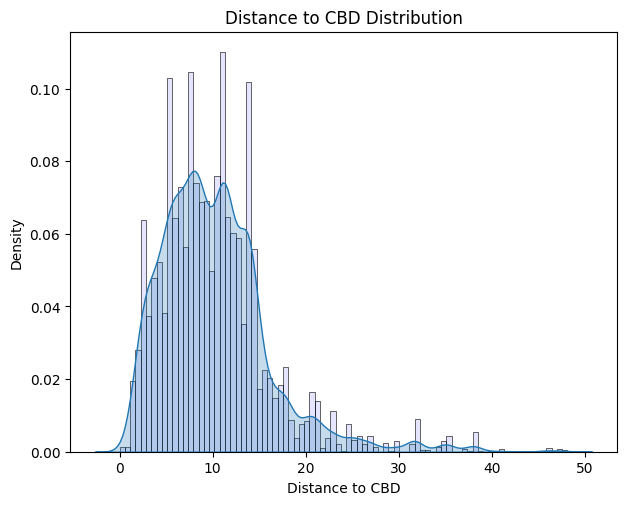

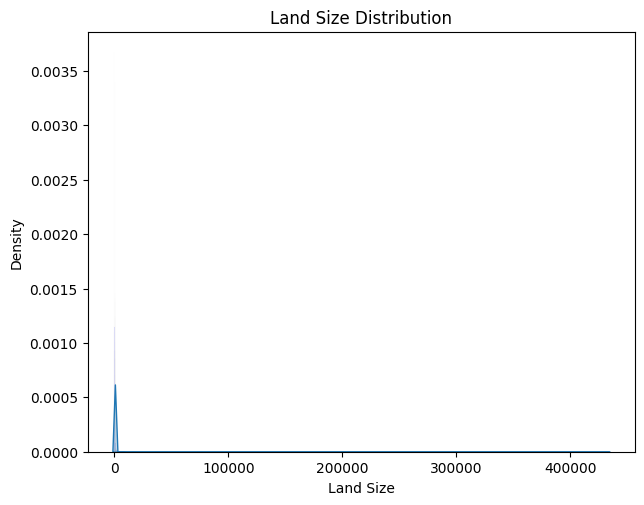

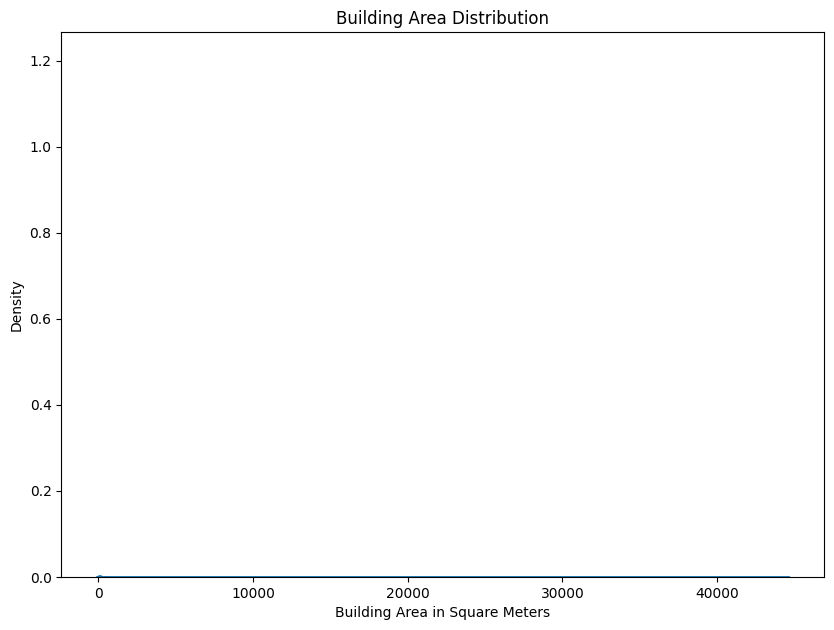

In [34]:




#Distance To CBD
plt.figure(figsize=(24,12))
plt.subplot(2,3,1)
sns.histplot(df['DistanceToCBD'], color='blue', alpha= 0.1, stat='density')
sns.kdeplot(df['DistanceToCBD'], fill= True)
plt.title('Distance to CBD Distribution')
plt.xlabel('Distance to CBD')
plt.ylabel('Density')


#Land Size
plt.figure(figsize=(24,12))
plt.subplot(2,3,2)
sns.histplot(df['LandSize'], color='blue', alpha= 0.1, stat='density')
sns.kdeplot(df['LandSize'], fill= True)
plt.title('Land Size Distribution')
plt.xlabel('Land Size')
plt.ylabel('Density')


#Building Area
plt.figure(figsize=(24,12))
plt.subplot(2,3,4)
sns.histplot(df['BuildingArea'], color='blue', alpha = 0.1, stat='density')
sns.kdeplot(df['BuildingArea'], fill= True)
plt.title("Building Area Distribution")
plt.xlabel('Building Area in Square Meters')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [35]:

# Checking outliers
for col in ['DistanceToCBD', 'LandSize', 'BuildingArea']:
  Q1= df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  percentile_99th = df[col].quantile(0.99)
  print(f"Upper Bound of {col}: ",  upper_bound)
  print(f"Lower Bound of {col}: ", lower_bound)
  print(f"99th Percentile of {col}: ",  percentile_99th)
  filtered_df_99th_percentile = df[df[col] >= percentile_99th]
  filtered_df_IQR = df[(df[col] <= lower_bound) | (df[col] >= upper_bound)]
  print(f"{col}: {len(filtered_df_IQR)} rows beyond/lower bounds")
  print(f"{col}: {len(filtered_df_99th_percentile)} instances beyond 99th Percentile")
  
  

Upper Bound of DistanceToCBD:  23.6
Lower Bound of DistanceToCBD:  -4.4
99th Percentile of DistanceToCBD:  34.1
DistanceToCBD: 502 rows beyond/lower bounds
DistanceToCBD: 157 instances beyond 99th Percentile
Upper Bound of LandSize:  1288.0
Lower Bound of LandSize:  -456.0
99th Percentile of LandSize:  2774.849999999995
LandSize: 393 rows beyond/lower bounds
LandSize: 151 instances beyond 99th Percentile
Upper Bound of BuildingArea:  135.5
Lower Bound of BuildingArea:  115.5
99th Percentile of BuildingArea:  372.0
BuildingArea: 6642 rows beyond/lower bounds
BuildingArea: 152 instances beyond 99th Percentile


I decided not to exclude outliers as it may have relatively significant impact on the model and eliminating it might undermine the relationship between each independent variable to price that we're trying to unearth. 

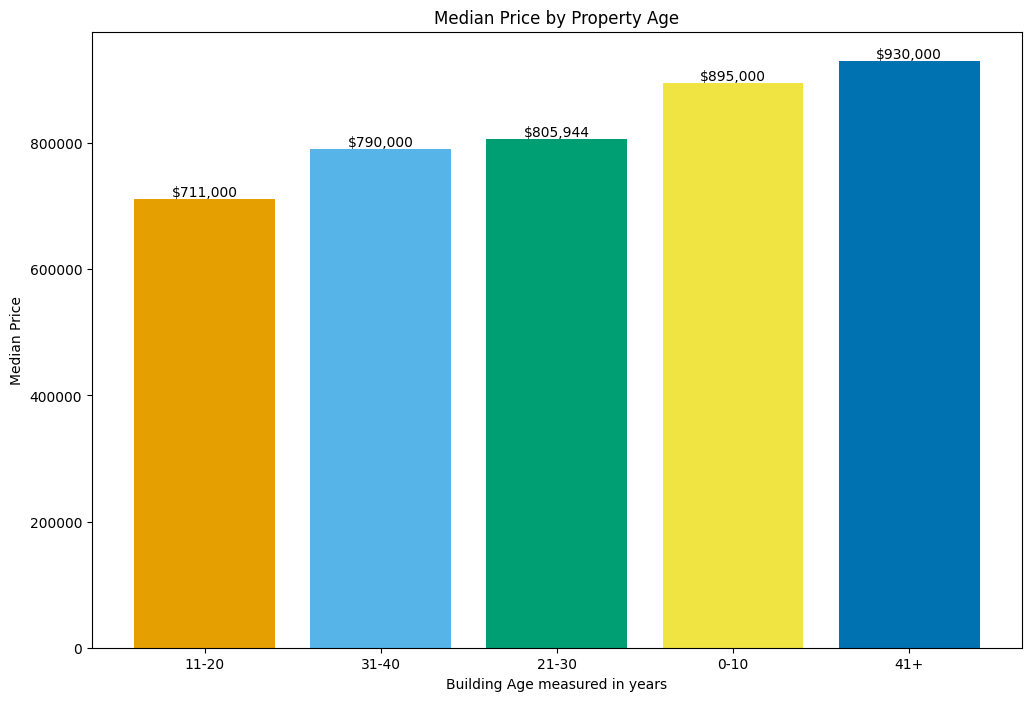

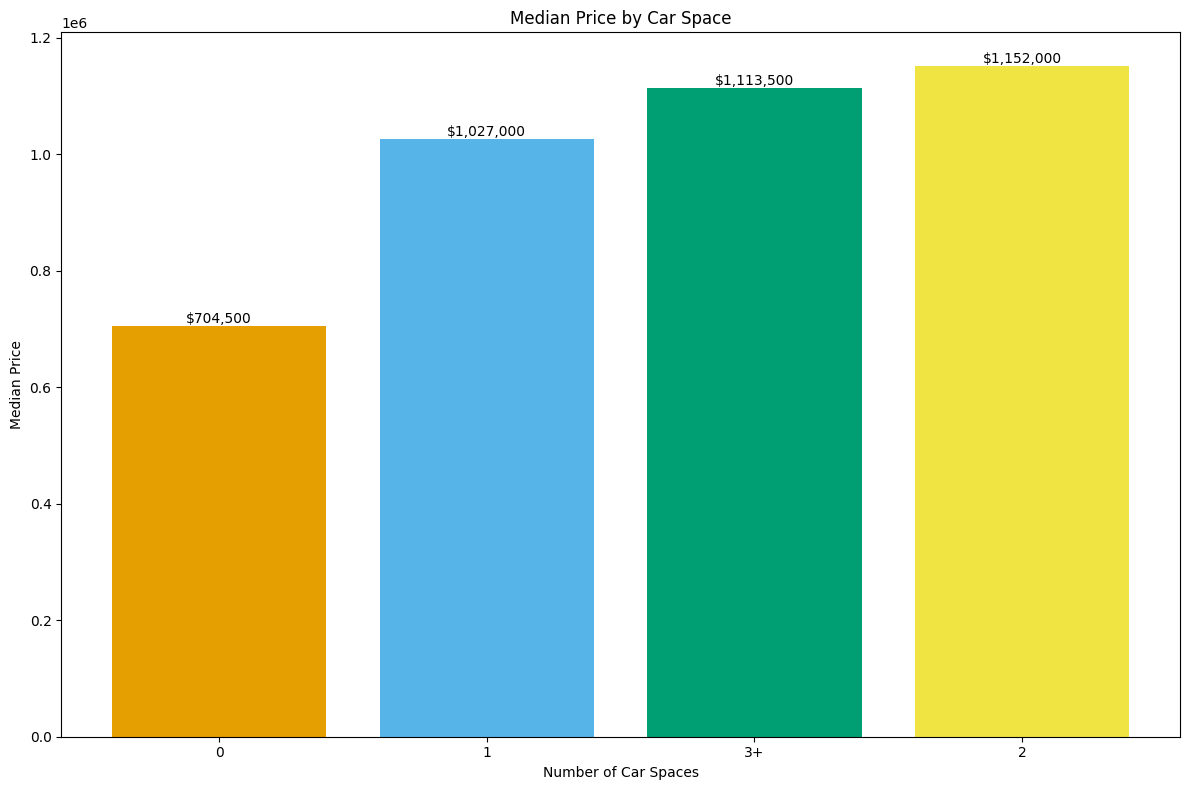

In [36]:

bar_colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2']
property_median_prices = []
property_categories = []

car_space_median_prices = []
car_space_categories = []


for col in property_age_dummies.columns:
  property_category = col.split('_')[1]
  property_median_price = df[property_age_dummies[col] == 1]['Price'].median()
  property_median_prices.append(property_median_price)
  property_categories.append(property_category)
  
property_price_data = pd.DataFrame({'Category': property_categories, 'MedianPrice': property_median_prices})
property_price_data = property_price_data.sort_values(by='MedianPrice')

for col in car_space_dummies.columns:
  car_space_category = col.split('_')[1]
  car_space_median_price = df[car_space_dummies[col] == 1]['Price'].median()
  car_space_median_prices.append(car_space_median_price)
  car_space_categories.append(car_space_category)
  
car_space_price_data = pd.DataFrame({'Category': car_space_categories, 'MedianPrice': car_space_median_prices})
car_space_price_data = car_space_price_data.sort_values(by='MedianPrice')

plt.figure(figsize=(12,8))
property_bars = plt.bar(property_price_data['Category'], property_price_data['MedianPrice'], color=bar_colors)
plt.title('Median Price by Property Age')
plt.xlabel('Building Age measured in years')
plt.ylabel('Median Price')
for bar in property_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')


plt.figure(figsize=(12,8))
car_space_bars = plt.bar(car_space_price_data['Category'], car_space_price_data['MedianPrice'], color= bar_colors)
plt.title('Median Price by Car Space')
plt.xlabel('Number of Car Spaces')
plt.ylabel('Median Price')

for bar in car_space_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')
    
    
plt.tight_layout()
plt.show()

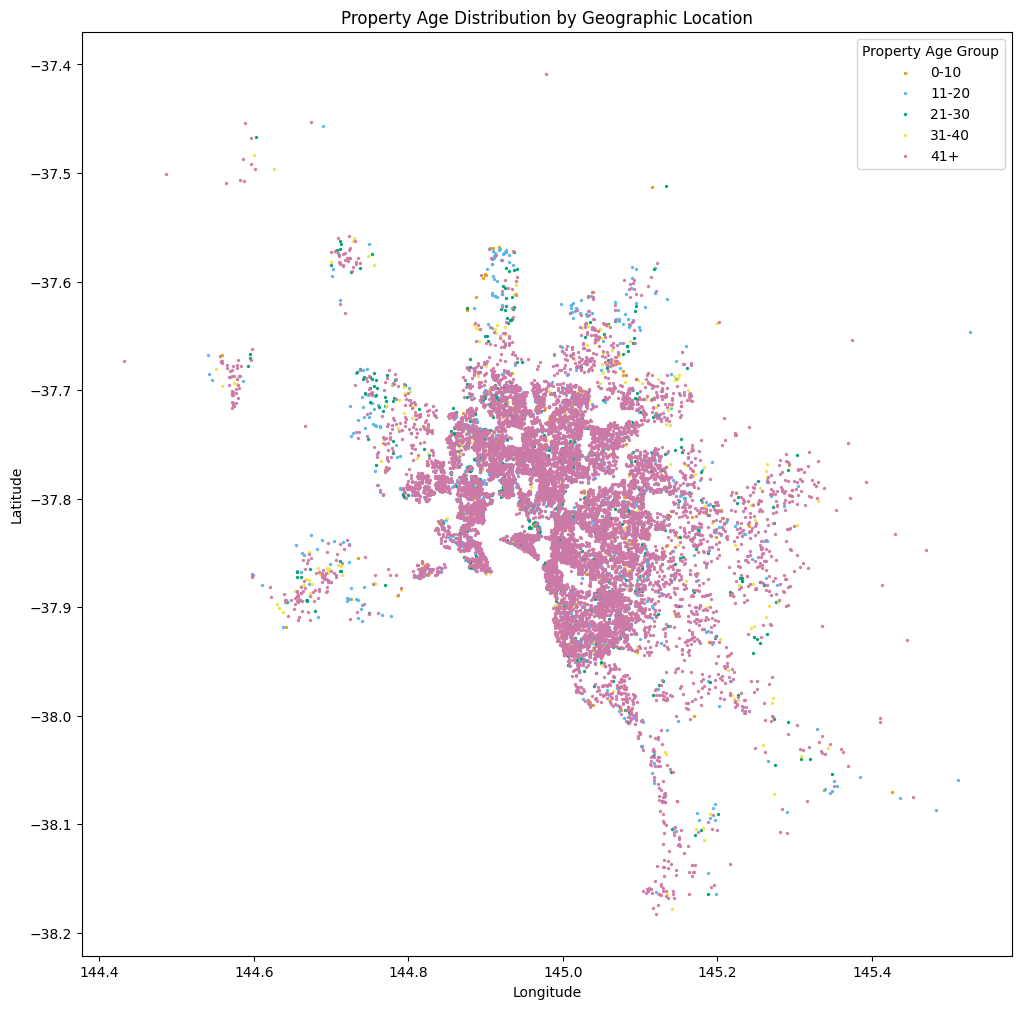

In [37]:

colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#CC79A7']

plt.figure(figsize=(12,12))

for age_group, color in zip(property_age_dummies.columns, colors):
    subset = df[df[age_group] == 1]
    plt.scatter(subset['Longitude'], subset['Latitude'], label=age_group.split('_')[1], color=color, alpha=0.9, s=2) 


# Add legend
plt.legend(title='Property Age Group')

plt.title('Property Age Distribution by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

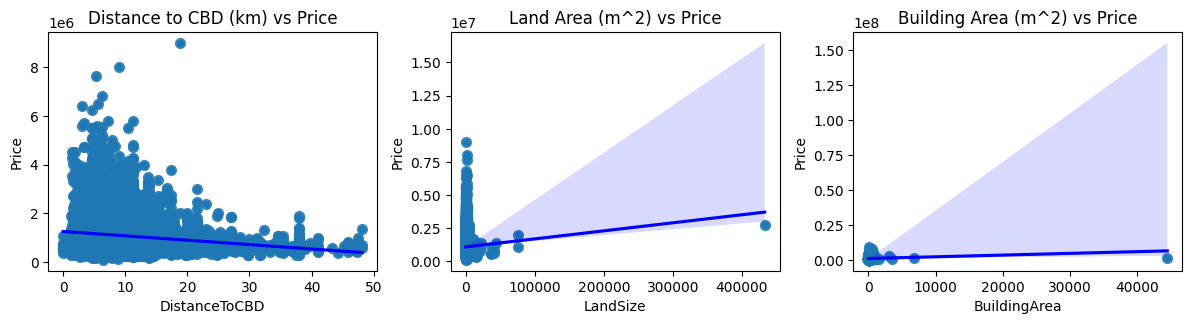

In [38]:

independent_variables = df[['DistanceToCBD', 'LandSize', 'BuildingArea']]
dependent_variable = df['Price']

#Adding Intercept
independent_variables = sm.add_constant(independent_variables)
OLS_model = sm.OLS(dependent_variable,independent_variables).fit()

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.scatterplot(x=df['DistanceToCBD'], y= df['Price'])
sns.regplot(x=df['DistanceToCBD'], y=df['Price'], ci = 95, line_kws={'color': 'blue'}, scatter_kws={'s':50})
plt.title('Distance to CBD (km) vs Price')

plt.subplot(2,3,2)
sns.scatterplot(x=df['LandSize'], y=df['Price'])
sns.regplot(x=df['LandSize'], y=df['Price'], ci=95, line_kws ={'color': 'blue'}, scatter_kws ={'s': 50})
plt.title('Land Area (m^2) vs Price')


plt.subplot(2,3,3)
sns.scatterplot(x=df['BuildingArea'], y=df['Price'])
sns.regplot(x=df['BuildingArea'], y=df['Price'], ci=95, line_kws={'color': 'blue'}, scatter_kws ={'s': 50})
plt.title('Building Area (m^2) vs Price')


plt.tight_layout(pad=1.0)
plt.show()


Based on the visual of the plot, we can certainly assume that 'Distance to CBD vs Price' does not meet the linearity assumption as the fitted line is nearly horizontal, implying weak relationship between variables. Quite a wide prediction band for 'Land Area vs Price' and 'Building Area vs Price' which may imply that there is an existence of leverage point mainly because of outliers exist in both of these regression plot. Such Uncertainty would also be explained high variability of the data meaning it does not truly fit the data well. From those plots, only 'No of Car Space vs Price' and 'Property Age vs Price' marginally met the assumption. But 'Property Age vs Price' has comparatively better fitted line compared to the former. Therefore, one of the widely accepted methods of data preprocessing such as log transformation would be suitable to essentially helps mitigating non-normalized data which, in this case, is positively-skewed. 


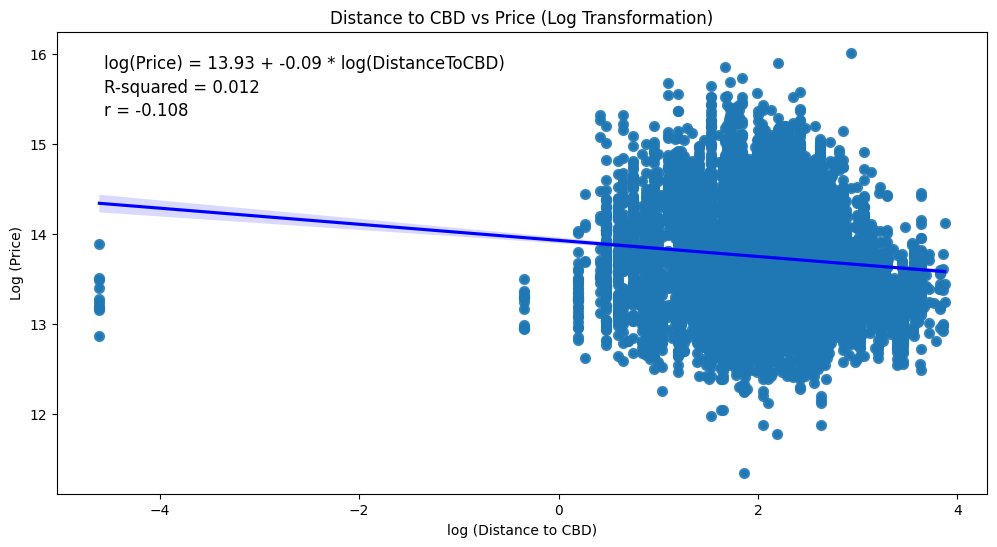

In [39]:
small_constant = 0.01 
df['logDistanceToCBD'] = np.log(df['DistanceToCBD'] + small_constant)
df['logPrice'] = np.log(df['Price'] + small_constant)

# Handle infinite values resulting from log transformation
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['logPrice', 'logDistanceToCBD'])

log_independent_variables = sm.add_constant(df['logDistanceToCBD'])
OLS_model_log = sm.OLS(df['logPrice'], log_independent_variables).fit()


slope = OLS_model_log.params['logDistanceToCBD']
intercept = OLS_model_log.params['const']
r_squared = OLS_model_log.rsquared
pearson_correlation, p_value = pearsonr(df['logDistanceToCBD'],df['logPrice'])
pearson_correlation_text = f'r = {pearson_correlation:.3f}'
equation = f'log(Price) = {intercept:.2f} + {slope:.2f} * log(DistanceToCBD)'
r_squared_text = f'R-squared = {r_squared:.3f}'

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['logDistanceToCBD'], y=df['logPrice'])
sns.regplot(x=df['logDistanceToCBD'], y = df['logPrice'], ci=95, line_kws={'color': 'blue'}, scatter_kws={'s':50})
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, pearson_correlation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.title('Distance to CBD vs Price (Log Transformation)')
plt.ylabel('Log (Price)')
plt.xlabel('log (Distance to CBD)')
plt.show()

## Testing Normality of Residuals
Using Q-Q plot, histogram, and shapiro-Wilk test to test the normality of the residuals.

<Figure size 1000x600 with 0 Axes>

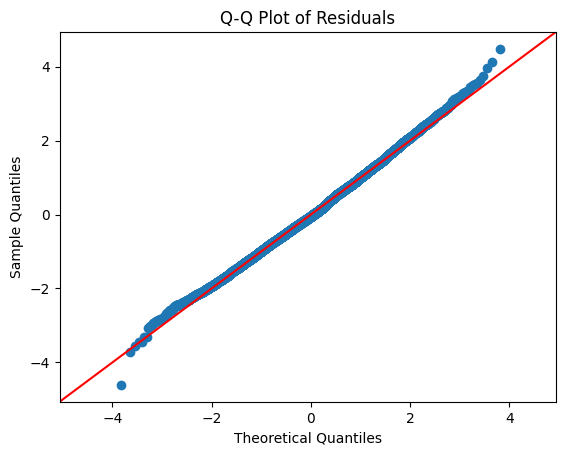

In [40]:


plt.figure(figsize=(10,6))
sm.qqplot(OLS_model_log.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


For the residuals to be normally distributed in this context, the data points should align to the line fitted in the graph but it seems that that it has a exponential curve shape instead of a 45 degrees alignment with the fit line. It appears that regression model assumption of normality of the residuals are met as the datapoints mostly fit the red-coloured 45 degrees line. 

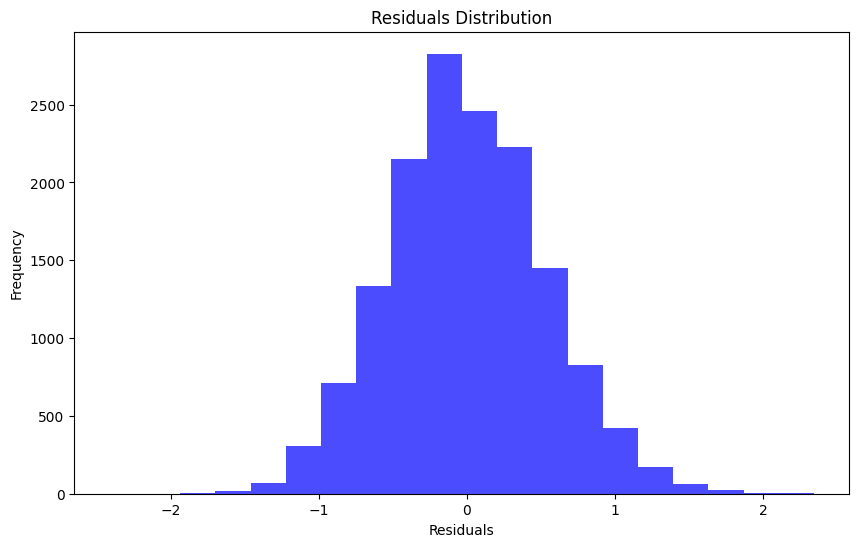

In [41]:
plt.figure(figsize=(10,6))
plt.hist(OLS_model_log.resid, bins=20, color='blue', alpha =0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [42]:
shapiro_wilk_test = stats.shapiro(OLS_model_log.resid)
print("Shapiro-Wilk Test: ", shapiro_wilk_test)

Shapiro-Wilk Test:  ShapiroResult(statistic=0.9983135174589026, pvalue=1.028806117173825e-11)


c:\Users\Dustin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15064.
  res = hypotest_fun_out(*samples, **kwds)


The p-value is astronomically low not even reaching the standard critical point of p-value which is 5%. Henceforth, it is safe to assume that the plot violates the test of normality. To top it off, the test of homoscedacity to check whether the variability of residuals are constant or not. 

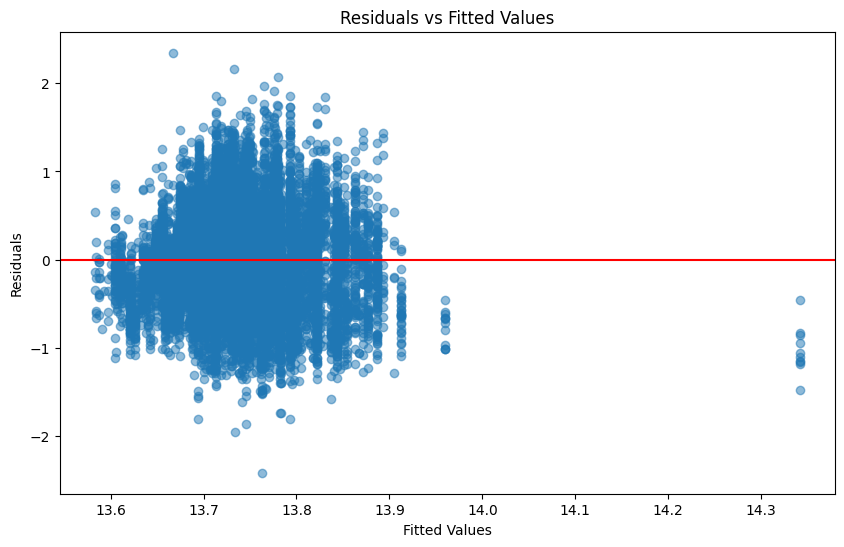

In [43]:


plt.figure(figsize=(10,6))
plt.scatter(OLS_model_log.fittedvalues, OLS_model_log.resid, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()



It appears that the spread of the residuals is not constant across the range of fitted values which is wider in the middle range of fitted values and narrower at the extremes. Additionally, it clearly shows there are clusters formed which implies that the spread is not random. 

With the assumptions not met, it is not possible to continue on our regression analysis without violating the assumptions which would undermine the credibility of the analysis.